In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

Import Data

In [2]:
#Import Data
uploaded = files.upload()

# Read the data
df = pd.read_csv('credit.csv')
df.head()

Saving credit.csv to credit.csv


,AcountNumber,CVV,CustomerAge,Gender,Marital Status,CardColour,CardType,Domain,Amount,AverageIncomeExpendicture,Outcome,Customer_City_Address
0,1275734409,364,28.0,Male,Married,Gold,Verve,Local,129282,170919,0,Enugu
1,1271246193,401,25.0,Male,Single,Gold,Verve,International,574384,329353,1,Enugu
2,1242290165,266,21.0,Female,Married,White,Visa,International,190766,292922,0,Enugu
3,1245478185,402,26.0,Male,Unknown,White,Visa,Local,130395,145444,0,Ibadan
4,1258212072,334,28.0,Female,Married,Gold,Verve,International,685145,295990,1,Port Harcourt


In [3]:
df = df.drop('CustomerAge', axis=1)

Splitting Data


In [4]:
# function split input and output
def split_input_output(data, target_column):
    """
    Function to split input (x) and output (y)

    Parameters
    ----------
    data : pd.DataFrame
        The sample data input

    target_column : str
        The output column name

    Return
    ------
    X : pd.DataFrame
        input data

    y : pd.DataFrame
        output data
    """
    X = data.drop(columns = target_column)
    y = data[target_column]

    # Validate
    print('X shape:', X.shape)
    print('y shape :', y.shape)

    return X, y


In [5]:
# Split input x and output y
X, y = split_input_output(data = df,
                          target_column = "Outcome")

# Show 5 first rows of input
X.head()

X shape: (37097, 10)
y shape : (37097,)


,AcountNumber,CVV,Gender,Marital Status,CardColour,CardType,Domain,Amount,AverageIncomeExpendicture,Customer_City_Address
0,1275734409,364,Male,Married,Gold,Verve,Local,129282,170919,Enugu
1,1271246193,401,Male,Single,Gold,Verve,International,574384,329353,Enugu
2,1242290165,266,Female,Married,White,Visa,International,190766,292922,Enugu
3,1245478185,402,Male,Unknown,White,Visa,Local,130395,145444,Ibadan
4,1258212072,334,Female,Married,Gold,Verve,International,685145,295990,Port Harcourt


In [6]:
# Show 5 first rows of output
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Outcome, dtype: int64

Validate data

In [7]:
# check data dimension
n_samples, n_features = X.shape

# print number samples and features
print(f"Number of samples  : {n_samples}")
print(f"Number of features : {n_features}")

Number of samples  : 37097
Number of features : 10


In [8]:
# check data features name
features_names = X.columns

# print name of features
print(f"name of features : {features_names}")

name of features : Index(['AcountNumber', 'CVV', 'Gender', 'Marital Status', 'CardColour',
       'CardType', 'Domain', 'Amount', 'AverageIncomeExpendicture',
       'Customer_City_Address'],
      dtype='object')


Split Train, Valid, and Test



In [9]:
from sklearn.model_selection import train_test_split

def split_train_valid_test(X, y, test_size, valid_size, stratify, random_state=42):
    """
    Split data into train & test

    Parameters
    ----------
    X : pd.DataFrame
        The input data

    y : pd.Series
        The output data

    test_size : float
        The proportion of number of test data to total data

    valid_size : float
        The proportion of number of validation data to total data

    stratify : pd.Series
        Reference to stratify the splitting

    random_state : int, default=42
        The random seed, for reproducibility

    Returns
    -------
    X_train : pd.DataFrame
        The input train data

    X_test : pd.DataFrame
        The input test data

    y_train : pd.Series
        The output train data

    y_test : pd.Series
        The output test data
    """
    # Split the data
    X_train, X_not_train, y_train, y_not_train = train_test_split(
        X,
        y,
        test_size = test_size + valid_size,
        stratify = stratify,
        random_state = random_state
    )

    # Then, split valid and test from not_train
    X_valid, X_test, y_valid, y_test = train_test_split(
        X_not_train,
        y_not_train,
        test_size = valid_size/(test_size + valid_size),
        stratify = y_not_train,
        random_state = random_state
    )

    # Validate
    print('X train shape:', X_train.shape)
    print('y train shape:', y_train.shape)
    print('X valid shape :', X_valid.shape)
    print('y valid shape :', y_valid.shape)
    print('X test shape :', X_test.shape)
    print('y test shape :', y_test.shape)

    return X_train, X_valid, X_test, y_train, y_valid, y_test


In [10]:
# Run the code
splitted_data = split_train_valid_test(
    X = X,
    y = y,
    test_size = 0.2,
    valid_size = 0.2,
    stratify = y,
    random_state = 42
)

X_train, X_valid, X_test, y_train, y_valid, y_test = splitted_data

X train shape: (22258, 10)
y train shape: (22258,)
X valid shape : (7419, 10)
y valid shape : (7419,)
X test shape : (7420, 10)
y test shape : (7420,)


Preprocess Data


In [11]:
X.head()

,AcountNumber,CVV,Gender,Marital Status,CardColour,CardType,Domain,Amount,AverageIncomeExpendicture,Customer_City_Address
0,1275734409,364,Male,Married,Gold,Verve,Local,129282,170919,Enugu
1,1271246193,401,Male,Single,Gold,Verve,International,574384,329353,Enugu
2,1242290165,266,Female,Married,White,Visa,International,190766,292922,Enugu
3,1245478185,402,Male,Unknown,White,Visa,Local,130395,145444,Ibadan
4,1258212072,334,Female,Married,Gold,Verve,International,685145,295990,Port Harcourt


In [12]:
# define numerical data
NUM_COLS = ['AcountNumber', 'CVV',
            'Amount', 'AverageIncomeExpendicture',]
# define categorical
CAT_COLS = ['Gender', 'Marital Status', 'CardColour',
            'CardType', 'Domain','Customer_City_Address']

In [13]:
# split
X_train_num = X_train[NUM_COLS]
X_train_cat = X_train[CAT_COLS]

In [14]:
X_train_cat.head()

,Gender,Marital Status,CardColour,CardType,Domain,Customer_City_Address
4530,Female,Single,White,Visa,International,Kano
5645,Male,Married,White,Visa,Local,Ota
35737,Male,Divorced,Gold,Verve,International,Ota
29863,Female,Married,White,Visa,International,Ibadan
9635,Male,Married,Gold,Verve,Local,Port Harcourt


Encode Categorical Data

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
# initiate encoder
encoder = OneHotEncoder(drop='if_binary',           # If the value is only 2, drop one
                        handle_unknown='ignore')    # If something is not recognized, 0 is all

In [17]:
# Fit encoder to categorical data in train data
encoder.fit(X_train_cat)

OneHotEncoder(drop='if_binary', handle_unknown='ignore')

In [18]:
# result encoder: feature name example
encoder.get_feature_names_out()

array(['Gender_Male', 'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Marital Status_Unknown',
       'CardColour_White', 'CardType_MasterCard', 'CardType_Verve',
       'CardType_Visa', 'Domain_Local', 'Customer_City_Address_Abuja',
       'Customer_City_Address_Enugu', 'Customer_City_Address_Ibadan',
       'Customer_City_Address_Kano', 'Customer_City_Address_Lagos',
       'Customer_City_Address_Ota', 'Customer_City_Address_Other',
       'Customer_City_Address_Port Harcourt'], dtype=object)

In [19]:
# Transform
X_train_cat_enc = pd.DataFrame(
    encoder.transform(X_train_cat).toarray(),
    columns = encoder.get_feature_names_out(),
    index = X_train_cat.index
)

X_train_cat_enc.head()

,Gender_Male,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Unknown,CardColour_White,CardType_MasterCard,CardType_Verve,CardType_Visa,Domain_Local,Customer_City_Address_Abuja,Customer_City_Address_Enugu,Customer_City_Address_Ibadan,Customer_City_Address_Kano,Customer_City_Address_Lagos,Customer_City_Address_Ota,Customer_City_Address_Other,Customer_City_Address_Port Harcourt
4530,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5645,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35737,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29863,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9635,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Missing Values

In [20]:
# Cek missing value
X_train.isna().any()

AcountNumber                 False
CVV                          False
Gender                       False
Marital Status               False
CardColour                   False
CardType                     False
Domain                       False
Amount                       False
AverageIncomeExpendicture    False
Customer_City_Address        False
dtype: bool

In [21]:
# Create an imputer, in case someone needs test data
from sklearn.impute import SimpleImputer

def imputerNumeric(data, imputer = None):
    if imputer == None:
        # Create imputer
        imputer = SimpleImputer(missing_values = np.nan,
                                strategy = "median")
        imputer.fit(data)

    # Transform data
    data_imputed = imputer.transform(data)
    data_imputed = pd.DataFrame(data = data_imputed,
                                columns = data.columns,
                                index = data.index)

    return data_imputed, imputer

In [22]:
train_imputed, train_imputer = imputerNumeric(data = X_train[NUM_COLS])

Combine Categorical and Numerical Data


In [23]:
# Join data
X_train_concat = pd.concat((X_train[NUM_COLS].copy(), X_train_cat_enc), axis=1)

# Validate
print('Data shape:', X_train_concat.shape)
X_train_concat.head()

Data shape: (22258, 22)


,AcountNumber,CVV,Amount,AverageIncomeExpendicture,Gender_Male,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Unknown,CardColour_White,...,CardType_Visa,Domain_Local,Customer_City_Address_Abuja,Customer_City_Address_Enugu,Customer_City_Address_Ibadan,Customer_City_Address_Kano,Customer_City_Address_Lagos,Customer_City_Address_Ota,Customer_City_Address_Other,Customer_City_Address_Port Harcourt
4530,1267759026,288,133013,183598,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5645,1279767295,362,732332,379311,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35737,1255326317,238,292209,345587,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29863,1260877830,447,246353,376153,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9635,1263785129,280,276593,139872,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Data Balancing

In [24]:
# Check training set
print('data_train old shape:', X_train_concat.shape)

data_train old shape: (22258, 22)


In [25]:
# Check the counts of response variable
y_train.value_counts()

Outcome
1    16422
0     5836
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

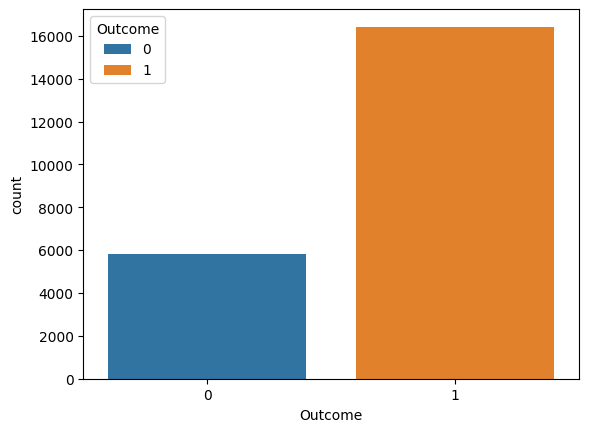

In [26]:
# Check the proportion before RUS
sns.countplot(x = y_train,
              hue = y_train,
              dodge = False)

Random Undersampling (RUS)

In [27]:
!pip install imblearn

In [28]:
from imblearn.under_sampling import RandomUnderSampler

def rus_fit_resample(x, y):

    # Create copy of set data
    x = x.copy()
    y = y.copy()

    # Create sampling object
    rus = RandomUnderSampler(random_state = 42)

    # Balancing data set
    x_rus, y_rus = rus.fit_resample(x, y)

    # Return balanced data set
    return x_rus, y_rus

In [29]:
# Perform RUS
x_rus, y_rus = rus_fit_resample(x = X_train_concat,
                                y = y_train)

<Axes: xlabel='Outcome', ylabel='count'>

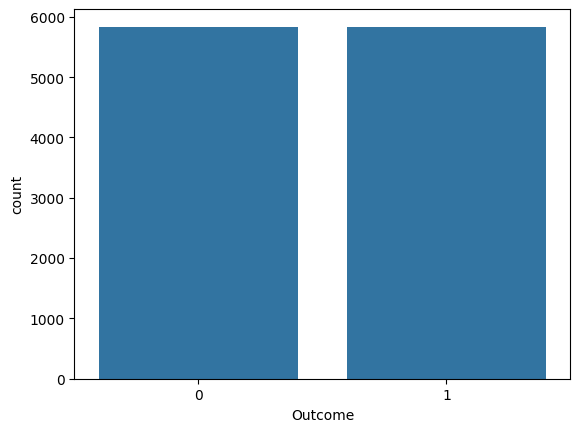

In [30]:
# Check the proportion of response categories
sns.countplot(x = y_rus,
              dodge = False)

In [31]:
# Check the balanced response
y_rus.value_counts()

Outcome
0    5836
1    5836
Name: count, dtype: int64

Random Oversampling (ROS)

In [32]:
from imblearn.over_sampling import RandomOverSampler

def ros_fit_resample(x,y):

    # Create copy of set data
    x = x.copy()
    y = y.copy()

    # Create sampling object
    ros = RandomOverSampler(random_state = 42)

    # Balancing data set
    x_ros, y_ros = ros.fit_resample(x, y)

    # Return balanced data set
    return x_ros, y_ros

In [33]:
# Perform ROS
x_ros, y_ros = ros_fit_resample(x = X_train_concat,
                                  y = y_train)

<Axes: xlabel='Outcome', ylabel='count'>

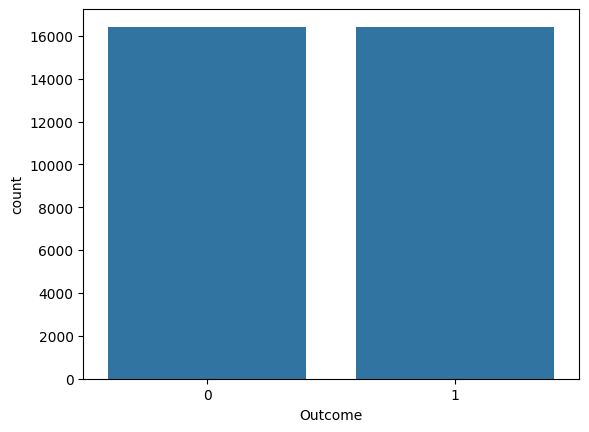

In [34]:
# Check the proportion of response categories
sns.countplot(x = y_ros,
              dodge = False)

In [35]:
# Check the balanced response
y_ros.value_counts()

Outcome
0    16422
1    16422
Name: count, dtype: int64

Modeling

In [36]:
# Import model

from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Create Models Original Training Set

In [37]:
model_dict = {
    'baseline': DummyClassifier(),
    'logistic regression': LogisticRegression(),
    'decision tree': DecisionTreeClassifier(random_state=42)
}

hyperparam_dict = {
    'baseline': {'strategy':['most_frequent']},
    'logistic regression': {'class_weight': [None, "balanced"]},
    'decision tree': {'max_depth': [5, 10, 20]}
}

Hyperparameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
# Perform modeling
models = []
auc_trains = []
auc_tests = []
best_params = []

for model_name in model_dict.keys():
    # Log
    print('start modeling', model_name)

    cv_ = GridSearchCV(estimator = model_dict[model_name],
                       param_grid = hyperparam_dict[model_name],
                       cv = 5,
                       scoring = 'roc_auc',
                       return_train_score = True,
                       verbose = 3)
    cv_.fit(X_train_concat, y_train)

    auc_trains_ = cv_.cv_results_['mean_train_score'][0]
    auc_tests_ = cv_.best_score_
    best_params_ = cv_.best_params_

    # append
    models.append(model_name)
    auc_trains.append(auc_trains_)
    auc_tests.append(auc_tests_)
    best_params.append(best_params_)

    # log
    print('finish modeling', model_name)
    print('')

start modeling baseline
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 2/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 3/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 4/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 5/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
finish modeling baseline

start modeling logistic regression
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END class_weight=None;, score=(train=0.919, test=0.920) total time=   0.2s
[CV 2/5] END class_weight=None;, score=(train=0.920, test=0.917) total time=   0.3s
[CV 3/5] END class_weight=None;, score=(train=0.919, test=0.921) total time=   0.3s
[CV 4/5] END class_weight=None;, score=(train=0.919, test=0.919) total time=   0.1s
[CV 5/5] END cl

Best Parameters

In [40]:
sum_exp = pd.DataFrame(
    {'model': models,
     'AUC train': auc_trains,
     'AUC test': auc_tests,
     'Best param': best_params}
)

sum_exp

,model,AUC train,AUC test,Best param
0,baseline,0.500000,0.500000,{'strategy': 'most_frequent'}
1,logistic regression,0.919149,0.919105,{'class_weight': None}
2,decision tree,0.948824,0.946131,{'max_depth': 5}


In [41]:
dt_best = DecisionTreeClassifier(max_depth = 5)
dt_best.fit(X_train_concat, y_train)

lr_best = LogisticRegression()
lr_best.fit(X_train_concat, y_train)

LogisticRegression()

Create Models RUS Training Set

In [42]:
model_dict = {
    'baseline': DummyClassifier(),
    'logistic regression': LogisticRegression(),
    'decision tree': DecisionTreeClassifier(random_state=42)
}

hyperparam_dict = {
    'baseline': {'strategy':['most_frequent']},
    'logistic regression': {},
    'decision tree': {'max_depth': [5, 10, 20]}
}

Hyperparameter Tuning

In [43]:
# Perform modeling
models = []
auc_trains = []
auc_tests = []
best_params = []

for model_name in model_dict.keys():
    # Log
    print('start modeling', model_name)

    cv_ = GridSearchCV(estimator = model_dict[model_name],
                       param_grid = hyperparam_dict[model_name],
                       cv = 5,
                       scoring = 'roc_auc',
                       return_train_score = True,
                       verbose = 3)
    cv_.fit(x_rus, y_rus)

    auc_trains_ = cv_.cv_results_['mean_train_score'][0]
    auc_tests_ = cv_.best_score_
    best_params_ = cv_.best_params_

    # append
    models.append(model_name)
    auc_trains.append(auc_trains_)
    auc_tests.append(auc_tests_)
    best_params.append(best_params_)

    # log
    print('finish modeling', model_name)
    print('')

start modeling baseline
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 2/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 3/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 4/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 5/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
finish modeling baseline

start modeling logistic regression
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..............., score=(train=0.909, test=0.910) total time=   0.0s
[CV 2/5] END ..............., score=(train=0.918, test=0.915) total time=   0.1s
[CV 3/5] END ..............., score=(train=0.909, test=0.908) total time=   0.1s
[CV 4/5] END ..............., score=(train=0.916, test=0.921) total time=   0.1s
[CV 5/5] END ...............

Best Parameters

In [44]:
sum_exp = pd.DataFrame(
    {'model': models,
     'AUC train': auc_trains,
     'AUC test': auc_tests,
     'Best param': best_params}
)

sum_exp

,model,AUC train,AUC test,Best param
0,baseline,0.500000,0.500000,{'strategy': 'most_frequent'}
1,logistic regression,0.913885,0.914305,{}
2,decision tree,0.948318,0.945386,{'max_depth': 5}


In [45]:
dt_best_rus = DecisionTreeClassifier(max_depth = 5)
dt_best_rus.fit(x_rus, y_rus)

lr_best_rus = LogisticRegression()
lr_best_rus.fit(x_rus, y_rus)

LogisticRegression()

Create Models ROS Training Set

In [46]:
model_dict = {
    'baseline': DummyClassifier(),
    'logistic regression': LogisticRegression(),
    'decision tree': DecisionTreeClassifier(random_state=42)
}

hyperparam_dict = {
    'baseline': {'strategy':['most_frequent']},
    'logistic regression': {},
    'decision tree': {'max_depth': [5, 10, 20]}
}

Hyperparameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
# Perform modeling
models = []
auc_trains = []
auc_tests = []
best_params = []

for model_name in model_dict.keys():
    # Log
    print('start modeling', model_name)

    cv_ = GridSearchCV(estimator = model_dict[model_name],
                       param_grid = hyperparam_dict[model_name],
                       cv = 5,
                       scoring = 'roc_auc',
                       return_train_score = True,
                       verbose = 3)
    cv_.fit(x_ros, y_ros)

    auc_trains_ = cv_.cv_results_['mean_train_score'][0]
    auc_tests_ = cv_.best_score_
    best_params_ = cv_.best_params_

    # append
    models.append(model_name)
    auc_trains.append(auc_trains_)
    auc_tests.append(auc_tests_)
    best_params.append(best_params_)

    # log
    print('finish modeling', model_name)
    print('')

start modeling baseline
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 2/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 3/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 4/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 5/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
finish modeling baseline

start modeling logistic regression
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..............., score=(train=0.919, test=0.917) total time=   0.2s
[CV 2/5] END ..............., score=(train=0.920, test=0.916) total time=   0.2s
[CV 3/5] END ..............., score=(train=0.910, test=0.914) total time=   0.1s
[CV 4/5] END ..............., score=(train=0.919, test=0.920) total time=   0.2s
[CV 5/5] END ...............

Best Parameters


In [49]:
sum_exp = pd.DataFrame(
    {'model': models,
     'AUC train': auc_trains,
     'AUC test': auc_tests,
     'Best param': best_params}
)

sum_exp

,model,AUC train,AUC test,Best param
0,baseline,0.500000,0.500000,{'strategy': 'most_frequent'}
1,logistic regression,0.915701,0.916149,{}
2,decision tree,0.949029,0.949059,{'max_depth': 10}


In [50]:
dt_best_ros = DecisionTreeClassifier(max_depth = 5)
dt_best_ros.fit(X_train_concat, y_train)

lr_best_ros = LogisticRegression()
lr_best_ros.fit(X_train_concat, y_train)


LogisticRegression()

Prediction

In [51]:
# Split cat & num
X_valid_num = X_valid[NUM_COLS]
X_valid_cat = X_valid[CAT_COLS]

# Encode cat
X_valid_cat_enc = pd.DataFrame(
    encoder.transform(X_valid_cat).toarray(),
    index = X_valid_cat.index,
    columns = encoder.get_feature_names_out()
)

# Concat
X_valid_concat = pd.concat((X_valid_num, X_valid_cat_enc), axis=1)
X_valid_concat

,AcountNumber,CVV,Amount,AverageIncomeExpendicture,Gender_Male,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Unknown,CardColour_White,...,CardType_Visa,Domain_Local,Customer_City_Address_Abuja,Customer_City_Address_Enugu,Customer_City_Address_Ibadan,Customer_City_Address_Kano,Customer_City_Address_Lagos,Customer_City_Address_Ota,Customer_City_Address_Other,Customer_City_Address_Port Harcourt
13206,1257848295,653,521274,333883,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12362,1256274995,497,967466,385455,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21429,1285242654,540,111840,216367,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27129,1276333497,599,715125,121092,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13406,1247823591,378,682241,268882,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36724,1283913568,283,981317,113810,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19996,1268912755,533,633944,209829,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36386,1252627550,361,325798,394834,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16009,1265619112,319,247278,253162,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [52]:
# Split cat & num
X_test_num = X_test[NUM_COLS]
X_test_cat = X_test[CAT_COLS]

# Encode cat
X_test_cat_enc = pd.DataFrame(
    encoder.transform(X_test_cat).toarray(),
    index = X_test_cat.index,
    columns = encoder.get_feature_names_out()
)

# Concat
X_test_concat = pd.concat((X_test_num, X_test_cat_enc), axis=1)
X_test_concat

,AcountNumber,CVV,Amount,AverageIncomeExpendicture,Gender_Male,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Unknown,CardColour_White,...,CardType_Visa,Domain_Local,Customer_City_Address_Abuja,Customer_City_Address_Enugu,Customer_City_Address_Ibadan,Customer_City_Address_Kano,Customer_City_Address_Lagos,Customer_City_Address_Ota,Customer_City_Address_Other,Customer_City_Address_Port Harcourt
1892,1274190601,388,194613,107477,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
33523,1282599683,295,741755,322360,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13098,1276446404,261,339430,321174,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23118,1263501428,235,379635,177315,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9833,1288564807,527,718567,385869,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19313,1259222021,404,180498,382235,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4650,1278638609,263,740214,235322,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15307,1269797778,468,469742,194487,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3453,1284197591,659,122398,283318,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Prediction on Validation Set

In [53]:
from sklearn.metrics import roc_auc_score

# Create list of models and training types
model = ["Logistic Regression",
         "Decision Tree"]

training_set = ["Original","RUS","ROS"]

# Create dataframe
auc_valid = pd.DataFrame(index = training_set, columns = model)
auc_valid

,Logistic Regression,Decision Tree
Original,NaN,NaN
RUS,NaN,NaN
ROS,NaN,NaN


In [54]:
def auc(model, X, y_act):
  # Perform prediction and calculate auc score

  y_pred = model.predict(X)
  auc_score = roc_auc_score(y_act, y_pred)

  return auc_score

Original Training Set

Logistic Regression

In [55]:
auc_valid.loc["Original", "Logistic Regression"] = auc(lr_best, X_valid_concat, y_valid)
auc_valid

,Logistic Regression,Decision Tree
Original,0.78606,NaN
RUS,NaN,NaN
ROS,NaN,NaN


Decision Tree

In [56]:
auc_valid.loc["Original", "Decision Tree"] = auc(dt_best, X_valid_concat, y_valid)
auc_valid

,Logistic Regression,Decision Tree
Original,0.78606,0.903054
RUS,NaN,NaN
ROS,NaN,NaN


RUS Training Set

Logistic Regression

In [57]:
auc_valid.loc["RUS", "Logistic Regression"] = auc(lr_best_rus, X_valid_concat, y_valid)
auc_valid

,Logistic Regression,Decision Tree
Original,0.78606,0.903054
RUS,0.831105,NaN
ROS,NaN,NaN


Decision Tree

In [58]:
auc_valid.loc["RUS", "Decision Tree"] = auc(dt_best_rus, X_valid_concat, y_valid)
auc_valid

,Logistic Regression,Decision Tree
Original,0.78606,0.903054
RUS,0.831105,0.907042
ROS,NaN,NaN


ROS Training Set

Logistic Regression

In [59]:
auc_valid.loc["ROS", "Logistic Regression"] = auc(lr_best_ros, X_valid_concat, y_valid)
auc_valid

,Logistic Regression,Decision Tree
Original,0.78606,0.903054
RUS,0.831105,0.907042
ROS,0.78606,NaN


Decision Tree

In [60]:
auc_valid.loc["ROS", "Decision Tree"] = auc(dt_best_ros, X_valid_concat, y_valid)
auc_valid

,Logistic Regression,Decision Tree
Original,0.78606,0.903054
RUS,0.831105,0.907042
ROS,0.78606,0.903054


Best Model on Train Data

In [61]:
y_train_pred = dt_best_rus.predict(X_train_concat)
y_train_pred

array([0, 1, 1, ..., 1, 0, 1])

In [62]:
roc = roc_auc_score(y_train, y_train_pred)

print('ROC  :', roc)

ROC  : 0.9082972999075364


In [63]:
result  = pd.crosstab(y_train_pred,
            y_train,
            margins = True)

In [64]:
result

Outcome,0,1,All
row_0,,,
0,5830,2995,8825
1,6,13427,13433
All,5836,16422,22258


Best Model on Validation Data

In [65]:
y_val_pred = dt_best_rus.predict(X_valid_concat)
y_val_pred

array([1, 1, 0, ..., 1, 0, 0])

In [66]:
roc = roc_auc_score(y_valid, y_val_pred)

print('ROC  :', roc)

ROC  : 0.9070423117274183


In [67]:
result  = pd.crosstab(y_val_pred,
            y_valid,
            margins = True)

In [68]:
result

Outcome,0,1,All
row_0,,,
0,1938,998,2936
1,7,4476,4483
All,1945,5474,7419


Best Model on Test Data

In [69]:
y_test_pred = dt_best_ros.predict(X_test_concat)
y_test_pred

array([0, 1, 1, ..., 0, 0, 0])

In [70]:
roc = roc_auc_score(y_test, y_test_pred)

print('ROC  :', roc)

ROC  : 0.9030064950597066


In [71]:
result  = pd.crosstab(y_test_pred,
            y_test,
            margins = True)

In [72]:
result

Outcome,0,1,All
row_0,,,
0,1924,1000,2924
1,22,4474,4496
All,1946,5474,7420


In [73]:
Presisi = 4474/(4474+1000)
Presisi

0.8173182316404822

In [74]:
Recall = 4474 / (4474+22)
Recall

0.9951067615658363